<a href="https://colab.research.google.com/github/ashleychoi121/Credit-Card-Fraudulent-Activity-Analysis/blob/main/Capstone_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The question that wants to be discovered thoughout this project is:

*The security team in a bank wants to identify fraudulent transactional activities.*

For this project, Credit Card Transaction data from Kaggle.com has been used to perform the analysis. 

Source of data: https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

In [ ]:
!pip install umap-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import umap
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 11.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=36b426423545570bd73b100e27ff9a5c59b073db3905a8536f80302da92d9cc9
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=cb7cb65574ae63ccb1ed247a23393d792e6797cefcceb5c7be41eaaaa6b52fbc
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [ ]:
# Importing data
# Data is from Kaggle.com <https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud?select=card_transdata.csv>
df = pd.read_csv('card_transdata.csv')

In [ ]:
#Making a copy of the dataframe
df_2 = df.copy()

In [ ]:
df_2

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [ ]:
df_2.shape

(1000000, 8)

For this project, credit card transaction data has been used. The dataset comprises of 1,000,000 number of data with 8 variables. All the varables are numerical values. 

In [ ]:
# To check is the data has any NaN values.
print(df_2.isna().sum())

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


The dataset do not have any NaN values. Thus, clearing NaN value is unnecessary.

In [ ]:
# Removing any duplicate data.
df_2.drop_duplicates(inplace = True)

Text(0.5, 1.0, 'correlation matrix')

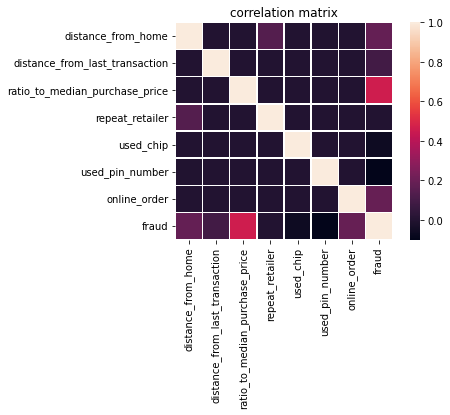

In [ ]:
# Visually looking at the correlationship of the variables.
import seaborn as sns
sns.heatmap(df_2.corr(), square=True, annot=False, linewidths=.5)
plt.title("correlation matrix")

0.0    912597
1.0     87403
Name: fraud, dtype: int64


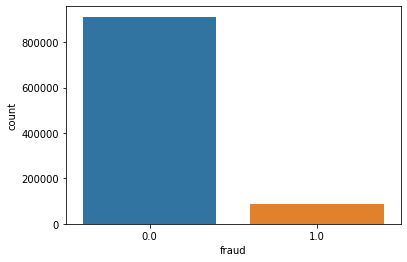

In [ ]:
# Checking the distribution of target variable.
sns.countplot(df_2["fraud"])
print(df_2['fraud'].value_counts())

87,403 number of data are fraud transactions out of total 1 milliion of transactions. It means 8.7% of transactions are fraudulent. 

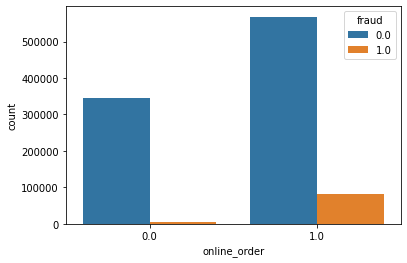

In [ ]:
#Counter plotting fraud grouped by online order
sns.countplot(df_2["online_order"],hue=df_2["fraud"])

Significantly more transactions are online orders instead of physical shopping at stores. However, the ratio of fraud transactions are similar whether it's online order or not.

In [ ]:
np.random.seed(123)
# Select 10000 data randomly due to too large number of data.
indices = np.random.choice(1000000,10000)
df_2 = df_2.loc[indices,:]

print(df_2.shape)

(10000, 8)


In [ ]:
# To define the target variable, whether the transaction was fraud of not, and independent variables.


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=df_2.drop(['fraud'],axis=1)
Y=df_2.fraud
X_std = scaler.fit_transform(X)  

In [ ]:
# PCA Dimentionality Reduction Method
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_std) 

In [ ]:
#Two-dimentional representation of PCA Dementionality reduction method.
plt.figure(figsize=(10,5))
colours = ["r","b","g","c"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(Y.iloc[i]),
             color=colours[int(Y.iloc[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

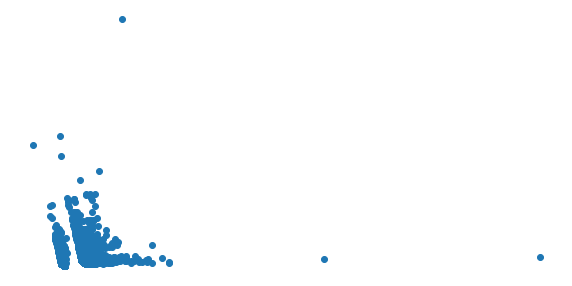

In [ ]:
#Local similarities graph
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

PCA Dimensionality Reduction model's graph do not give a clear result.

In [ ]:
# t-SNE Dimentionality Reduction
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.019s...
[t-SNE] Computed neighbors for 10000 samples in 0.422s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.709799
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.656670
[t-SNE] KL divergence after 300 iterations: 2.316524


t-SNE model took longer time to execute the code compared to PCA. 

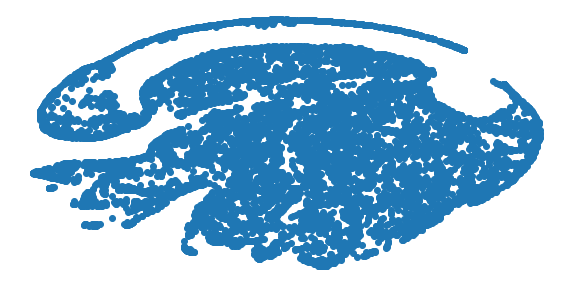

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In terms of local similarity graph, t-SNE seems more divided into groups, but it is hard to choose the better model by looking at above graphs. 

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.014s...
[t-SNE] Computed neighbors for 10000 samples in 0.583s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.804800
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.132156
[t-SNE] KL divergence after 300 iterations: 2.029342


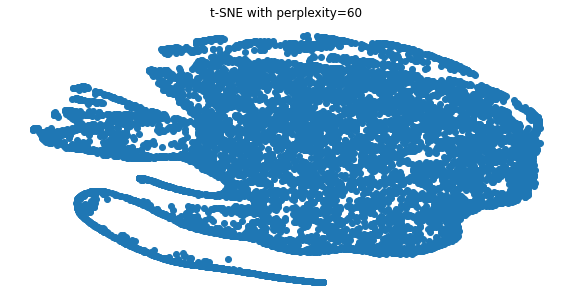

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=60, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("t-SNE with perplexity=60")
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Different perplexity has been applied for t-SNE. The model it not a lot different from the previous t-SNE model.  

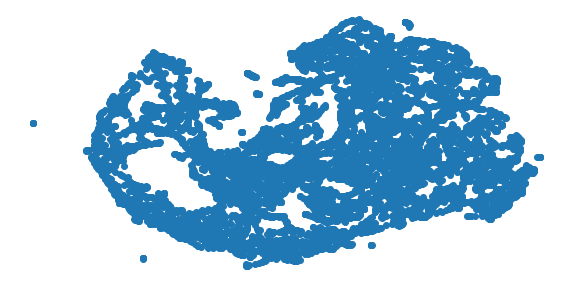

In [ ]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

UMAP has been utilized as the last Dimensionality Reduction model for this project. Graphically, the model gives broader view compared to PCA but not better view compared to t-SNE. 

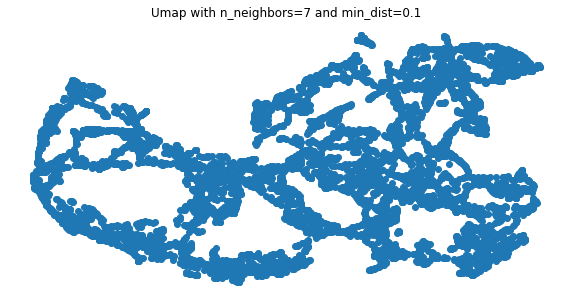

In [ ]:
umap_results = umap.UMAP(n_neighbors=7,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=7 and min_dist=0.1")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Another UMAP model has been used with increased number of nieghbors to 7 and decreased min-dist to 0.1. The graph is more divided into groups compared to previous UMAP model. 

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(pca_components)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(pca_components)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(pca_components)

print("ARI for two cluster k-means: {}".format(
    metrics.adjusted_rand_score(Y, pred_2)))
print("ARI for three cluster k-means: {}".format(
    metrics.adjusted_rand_score(Y, pred_3)))
print("ARI for four cluster k-means: {}".format(
    metrics.adjusted_rand_score(Y, pred_4)))

ARI for two cluster k-means: 0.20296998519306872
ARI for three cluster k-means: 0.10120324153042251
ARI for four cluster k-means: 0.10059730975901982


K-Means method has been used for clustering. two-cluster K-Means model had the best score in terms of ARI.

In [ ]:
print("Silhouette score for two cluster k-means: {}".format(
    metrics.silhouette_score(pca_components, pred_2, metric='euclidean')))
print("Silhouette score for three cluster k-means: {}".format(
    metrics.silhouette_score(pca_components, pred_3, metric='euclidean')))
print("Silhouette score for four cluster k-means: {}".format(
    metrics.silhouette_score(pca_components, pred_4, metric='euclidean')))

Silhouette score for two cluster k-means: 0.56866939947411
Silhouette score for three cluster k-means: 0.6760462998301284
Silhouette score for four cluster k-means: 0.6788334300627757


K-Means Silhouette scores are comparably high, and four-clusters model resulted the highest score. 

In [ ]:
from sklearn.cluster import DBSCAN
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

clusters = dbscan_cluster.fit_predict(pca_components)

print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(Y, clusters)))
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(pca_components, clusters, metric='euclidean')))

Adjusted Rand Index of the DBSCAN solution: -0.000807629043919622
The silhouette score of the DBSCAN solution: 0.618181023643096


DBSCAN used for another clustering model. Negative ARI score came out, but it gave high silhouette score.

In [ ]:
from sklearn.mixture import GaussianMixture
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(pca_components)

print("ARI score: {}".format(
    metrics.adjusted_rand_score(Y, clusters)))

print("Silhouette score: {}".format(
    metrics.silhouette_score(pca_components, clusters, metric='euclidean')))

ARI score: 0.22344945949428616
Silhouette score: 0.4749669884265485


Third clustering model is Gaussian Mixture. It gives the best ARI score but the worst Silhouette score compared to previous models. 

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=2)


# Fit model
clusters = agg_cluster.fit_predict(pca_components)

print("ARI score of linkage method average: {}".format(
    metrics.adjusted_rand_score(Y, clusters)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(pca_components, clusters, metric='euclidean')))

ARI score of linkage method average: 0.17508812359776627
Silhouette score of linkage method average: 0.4057609808208884


Lastly, Agglomerative Clustering model has been used. 

Overall, Gaussian Mixture Model gives the highest ARI score, and K-Means gives the highest Silhouette Score. 